# Name : Ch. Venkata Karthik
# Task 1 : Prediction using Supervised ML
Predict the percentage of an student based on the no. of study hours.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('http://bit.ly/w-data')
print("Imported Succesfully")
ds.head()

Imported Succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
ds.isna().sum()

Hours     0
Scores    0
dtype: int64

It's good to see that there are no null values in the dataset

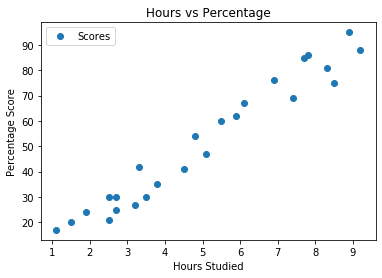

In [4]:
ds.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [5]:
correlation = ds['Hours']. corr(ds['Scores'])
correlation

0.9761906560220887

Here we can see that there is a good correlation between the 2 entities and from the graph we can observe that the relation is linear from the dataset.

# Linear Regression

In [6]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

Here X is our input variable and y is out target variable

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Here, by using Scikit-Learn's built-in train_test_split() method, i divided the dataset for training part and for testing part in the ratio of 8:2(since dataset is small)

Now, to train the algorithm, we use LinearRegression from sklearn.linear_model

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print('Training is done')

Training is done


This regressor has the values of coefficient and intercept of the linear plot it has done. And they are...

In [9]:
regressor.coef_[0], regressor.intercept_

(9.910656480642237, 2.018160041434683)

Now, let's plot this in the graph

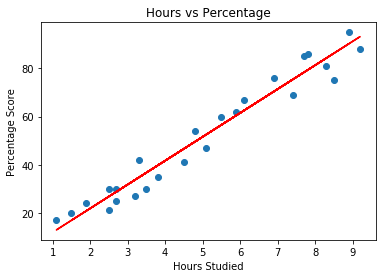

In [10]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line, color='red');
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
plt.show()

To evaluate this model, we need to find its mean absolute error

# Evaluation

In [11]:
y_pred = regressor.predict(X_test)
data ={'Real':y_test, 'Predicted':y_pred}

In [12]:
testing = pd.DataFrame(data)
testing

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In the statement, it was mentioned to find the be predicted score if a student studies for 9.25 hrs/ day

In [14]:
time = np.array([9.25])
pred_score = regressor.predict(time.reshape(-1,1))
print('The predicted score if a student studies for 9.25 hrs/ day is', pred_score[0])

The predicted score if a student studies for 9.25 hrs/ day is 93.69173248737538
